#imports library

In [3]:
 import numpy as np
 import pandas as pd
 from keras.datasets import mnist 
 from tensorflow import keras

# load data

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


#flatten(convert 2d into 1d)

In [5]:
new_x_train=x_train.reshape(-1,784)
new_x_train.shape
new_x_test=x_test.reshape(-1,784)
new_x_test.shape

(10000, 784)

#Normalization

In [6]:
final_x_train=new_x_train/256
final_x_test=new_x_test/256

#build model

In [7]:
model=keras.Sequential()
model.add(keras.layers.Dense(10,input_shape=(784,),activation='softmax'))

#compile model

In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics='accuracy')

#train model 

In [28]:
result =model.fit(
    final_x_train,
    y_train,
    epochs=10,
    shuffle=True,
    batch_size=8,
    validation_data = (final_x_test,y_test),
)

Epoch 1/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.2642 - accuracy: 0.9268 - val_loss: 0.2702 - val_accuracy: 0.9249
Epoch 2/10
7500/7500 [==============================] - 17s 2ms/step - loss: 0.2633 - accuracy: 0.9272 - val_loss: 0.2703 - val_accuracy: 0.9231
Epoch 3/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.2624 - accuracy: 0.9273 - val_loss: 0.2717 - val_accuracy: 0.9232
Epoch 4/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.2617 - accuracy: 0.9276 - val_loss: 0.2688 - val_accuracy: 0.9231
Epoch 5/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.2611 - accuracy: 0.9281 - val_loss: 0.2692 - val_accuracy: 0.9233
Epoch 6/10
7500/7500 [==============================] - 17s 2ms/step - loss: 0.2604 - accuracy: 0.9279 - val_loss: 0.2686 - val_accuracy: 0.9253
Epoch 7/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.2598 - accuracy: 0.9284 - val_loss: 0.2679 - val_ac

#test model 

In [26]:
evo=model.evaluate(
    final_x_test,
    y_test,
)

313/313 [==============================] - 1s 2ms/step - loss: 0.2702 - accuracy: 0.9227


#draw accuracy and loss 

Text(0.5, 0, 'epoch')

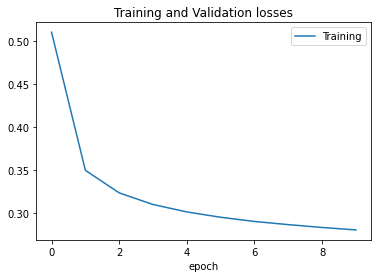

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(result.history['loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

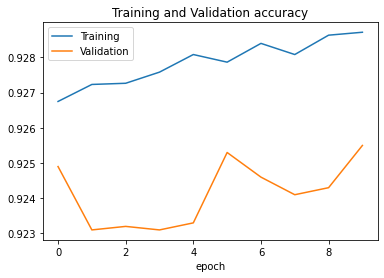

In [29]:
#plt.plot(evo.history['accuracy'])
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')